In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

In [3]:
from sklearn import datasets
dataset_boston = datasets.load_boston()
data = pd.DataFrame(data=dataset_boston['data'], columns=dataset_boston['feature_names'])
data['MEDV'] = dataset_boston['target']

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
X = data.drop(columns='MEDV')
y = data['MEDV']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
dict_ = {}
depth = [x for x in range(1,20)]

for x in depth:
    model = DecisionTreeRegressor(max_depth=depth[x-1], random_state=0)
    model.fit(X_train, y_train)
    dict_[x] = model.score(X_test, y_test)
    
dict_

{1: 0.372305774917164,
 2: 0.622596538377147,
 3: 0.6628873063238391,
 4: 0.6678638597655544,
 5: 0.700741432004224,
 6: 0.7132901741909659,
 7: 0.6509759989265929,
 8: 0.6819190879143924,
 9: 0.6661620179465151,
 10: 0.7021288742961906,
 11: 0.6748556015358533,
 12: 0.6691898368595269,
 13: 0.6728325779257729,
 14: 0.6221994075989375,
 15: 0.6735023399803558,
 16: 0.6726394999262832,
 17: 0.6835179161458892,
 18: 0.6835179161458892,
 19: 0.6835179161458892}

In [8]:
model = DecisionTreeRegressor(max_depth=17, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6835179161458892

In [9]:
X = data[['RM', 'LSTAT', 'CRIM', 'TAX']]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeRegressor(max_depth=17, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7537051787713388

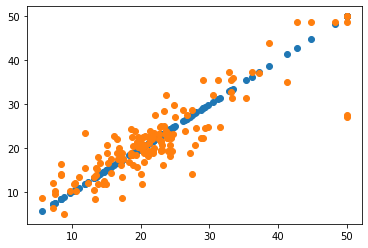

In [10]:
plt.figure
plt.scatter(y_test, y_test)
plt.scatter(y_test, model.predict(X_test))

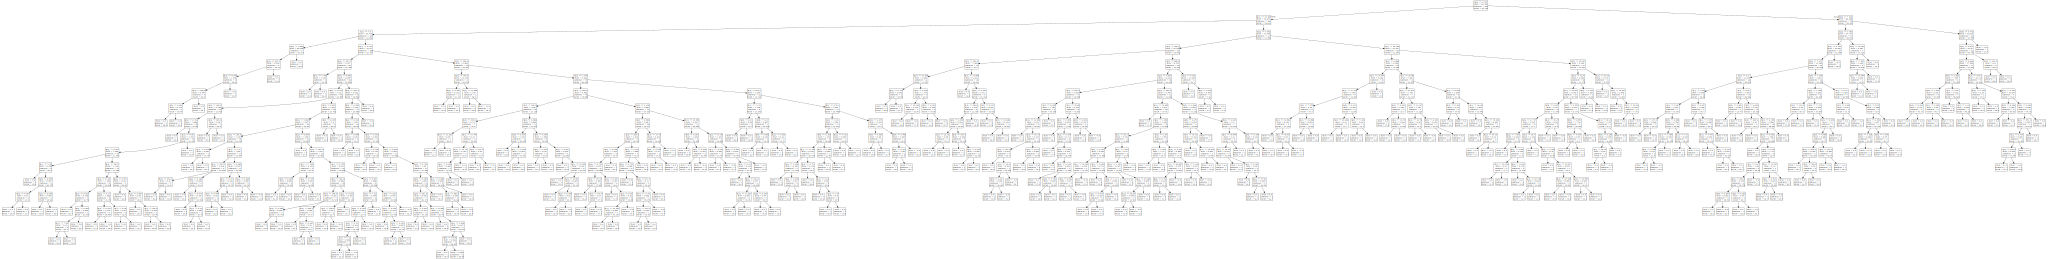

In [12]:
graphviz.Source(tree.export_graphviz(model))